# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency


from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [4]:
df = pd.read_csv("C:\\Users\\niranjana\\Downloads\\archive (3)\\Extended_Employee_Performance_and_Productivity_Data.csv")
df

Employee_ID        Department  Gender  Age   Job_Title  \
0                1                IT    Male   55  Specialist   
1                2           Finance    Male   29   Developer   
2                3           Finance    Male   55  Specialist   
3                4  Customer Support  Female   48     Analyst   
4                5       Engineering  Female   36     Analyst   
...            ...               ...     ...  ...         ...   
99995        99996           Finance    Male   27  Technician   
99996        99997                IT  Female   36  Consultant   
99997        99998        Operations    Male   53     Analyst   
99998        99999                HR  Female   22  Consultant   
99999       100000           Finance  Female   43     Analyst   

       Years_At_Company Education_Level  Performance_Score  Monthly_Salary  \
0                     2     High School                  5            6750   
1                     0     High School                  5            7500   
2                     8     High School                  3            5850   
3                     7        Bachelor                  2            4800   
4                     3        Bachelor                  2            4800   
...                 ...             ...                ...             ...   
99995                 1        Bachelor                  4            4900   
99996                 6          Master                  5            8250   
99997                 8     High School                  2            4800   
99998                 9     High School                  5            8250   
99999                 0             PhD                  1            4400   

       Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  Sick_Days  \
0                       33                32              22          2   
1                       34                34              13         14   
2                       37                27               6          3   
3                       52                10              28         12   
4                       38                11              29         13   
...                    ...               ...             ...        ...   
99995                   55                46               5          3   
99996                   39                35               7          0   
99997                   31                13               6          5   
99998                   35                43              10          1   
99999                   51                43              27         11   

       Remote_Work_Frequency  Team_Size  Training_Hours  Promotions  \
0                          0         14              66           0   
1                        100         12              61           2   
2                         50         10               1           0   
3                        100         10               0           1   
4                        100         15               9           1   
...                      ...        ...             ...         ...   
99995                     75         16              48           2   
99996                      0         10              77           1   
99997                      0          5              87           1   
99998                     75          2              31           1   
99999                     75         13              45           1   

       Employee_Satisfaction_Score  Resigned  
0                             2.63     False  
1                             1.72     False  
2                             3.17     False  
3                             1.86     False  
4                             1.25     False  
...                            ...       ...  
99995                         1.28     False  
99996                         3.48      True  
99997                         2.60     False  
99998                         3.10     False  
99999             

### About Dataset

1.Employee_ID: Unique identifier for each employee.
2.Department: The department in which the employee works (e.g., Sales, HR, IT).
3.Gender: Gender of the employee (Male, Female, Other).
4.Age: Employee's age (between 22 and 60).
5.Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
7.Years_At_Company: The number of years the employee has been working for the company.
8.Education_Level: Highest educational qualification (High School, Bachelor, Master, PhD).
9.Performance_Score: Employee's performance rating (1 to 5 scale).
10.Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
11.Work_Hours_Per_Week: Number of hours worked per week.
12.Projects_Handled: Total number of projects handled by the employee.(0-49)
13.Overtime_Hours: Total overtime hours worked in the last year.(0-29)
14.Sick_Days: Number of sick days taken by the employee.(0-12)
15.Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).
16.Team_Size: Number of people in the employee's team.(1-19)
17.Training_Hours: Number of hours spent in training.(0-99)
18.Promotions: Number of promotions received during their tenure.(0-2)
19.Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
20.Resigned: Boolean value indicating if the employee has resigned.

In [7]:
df.shape

(100000, 19)

In [8]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                   int64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

In [9]:
df.isnull()

Employee_ID  Department  Gender    Age  Job_Title  Years_At_Company  \
0            False       False   False  False      False             False   
1            False       False   False  False      False             False   
2            False       False   False  False      False             False   
3            False       False   False  False      False             False   
4            False       False   False  False      False             False   
...            ...         ...     ...    ...        ...               ...   
99995        False       False   False  False      False             False   
99996        False       False   False  False      False             False   
99997        False       False   False  False      False             False   
99998        False       False   False  False      False             False   
99999        False       False   False  False      False             False   

       Education_Level  Performance_Score  Monthly_Salary  \
0                False              False           False   
1                False              False           False   
2                False              False           False   
3                False              False           False   
4                False              False           False   
...                ...                ...             ...   
99995            False              False           False   
99996            False              False           False   
99997            False              False           False   
99998            False              False           False   
99999            False              False           False   

       Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  Sick_Days  \
0                    False             False           False      False   
1                    False             False           False      False   
2                    False             False           False      False   
3                    False             False           False      False   
4                    False             False           False      False   
...                    ...               ...             ...        ...   
99995                False             False           False      False   
99996                False             False           False      False   
99997                False             False           False      False   
99998                False             False           False      False   
99999                False             False           False      False   

       Remote_Work_Frequency  Team_Size  Training_Hours  Promotions  \
0                      False      False           False       False   
1                      False      False           False       False   
2                      False      False           False       False   
3                      False      False           False       False   
4                      False      False           False       False   
...                      ...        ...             ...         ...   
99995                  False      False           False       False   
99996                  False      False           False       False   
99997                  False      False           False       False   
99998                  False      False           False       False   
99999                  False      False           False       False   

       Employee_Satisfaction_Score  Resigned  
0                            False     False  
1                            False     False  
2                            False     False  
3                            False     False  
4                            False     False  
...                            ...       ...  
99995                        False     False  
99996                        False     False  
99997                        False     False  
99998                        False     False  
99999                        False     False  

[100000 rows x 19 

In [10]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

## Value count for each column

In [14]:
for col in df:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Employee_ID:
Employee_ID
1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: count, Length: 100000, dtype: int64

Value counts for Department:
Department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

Value counts for Age:
Age
53    2657
27    2628
50    2620
28    2617
40    2609
46    2604
57    2601
24    2598
56    2598
39    2596
43    2594
47    2594
48    2590
52    2586
41    2585
26    2584
58    2577
51    2576
25    2570
31    2566
54    2563
34    2560
36    2558
49    2557
37    2552
55    2544
44    2539
30    2539
60    2535
32    2531
42    2528
33    25

## Univariate Analysis

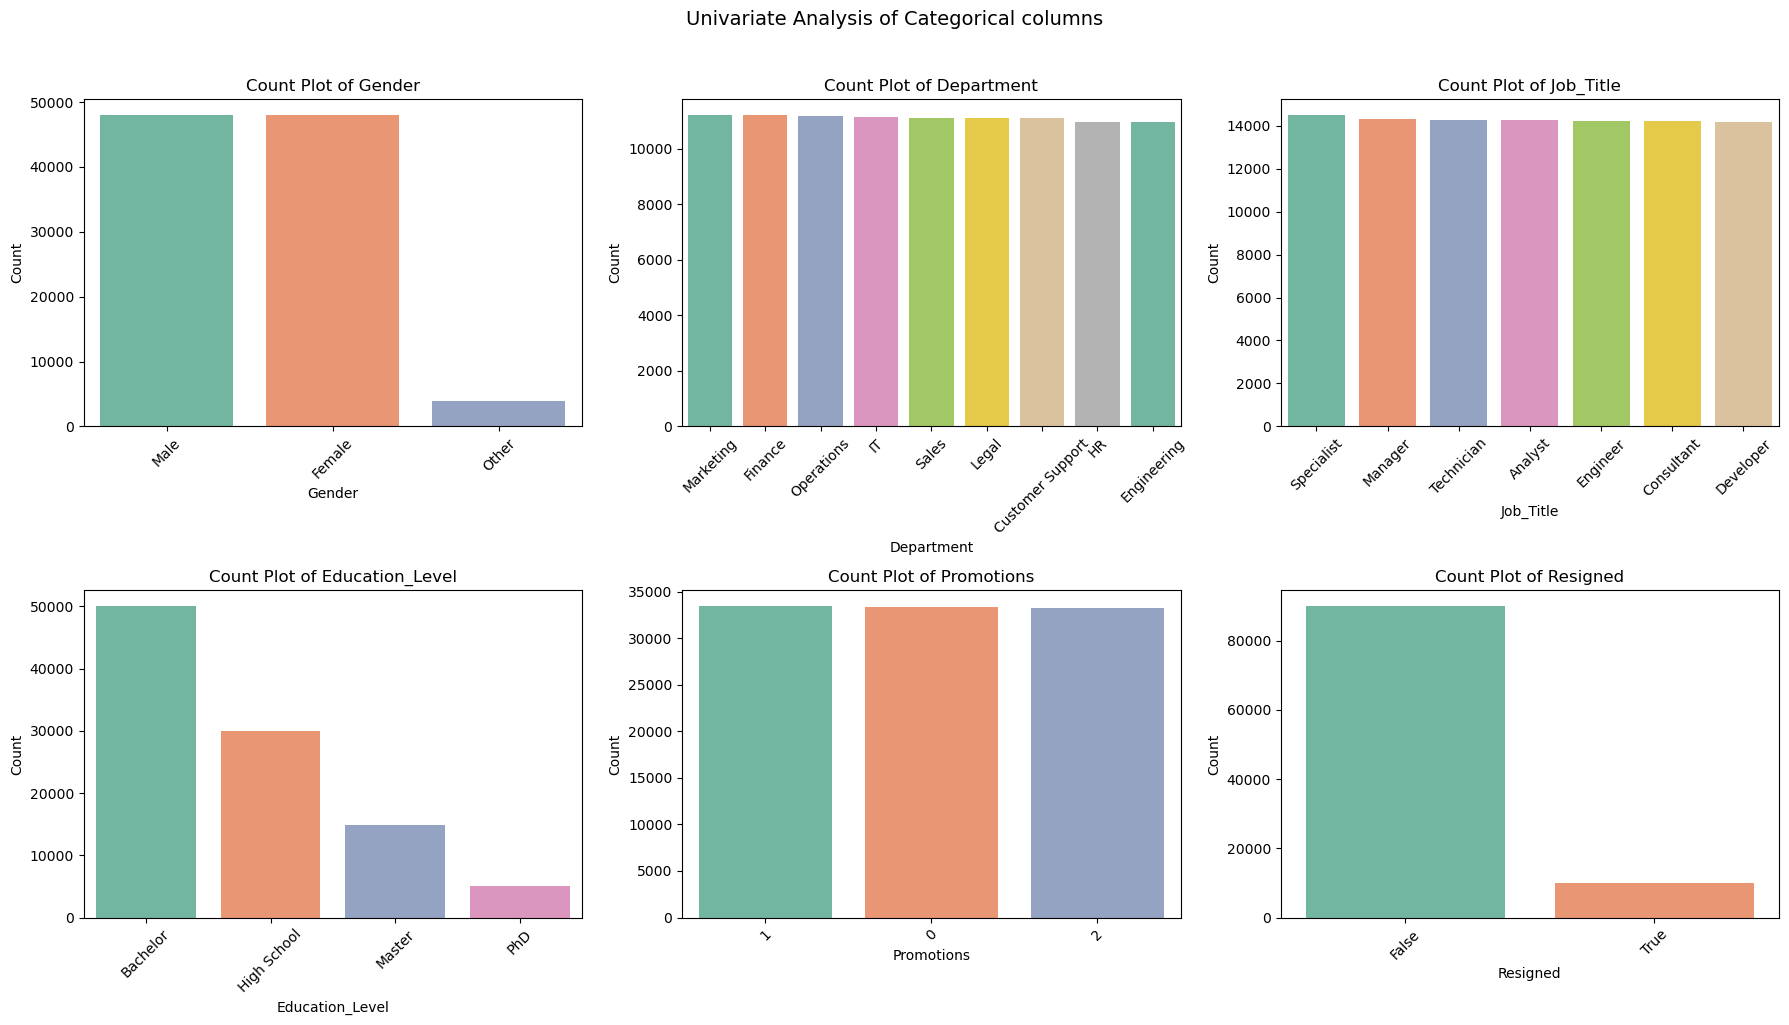

In [16]:

categorical_columns = ['Gender','Department','Job_Title','Education_Level','Promotions',
       'Resigned'] 


rows = 2
cols = 3
total_plots = len(categorical_columns)

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten() 

# count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', order=df[column].value_counts().index)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45) 

fig.suptitle("Univariate Analysis of Categorical columns", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [17]:
#INFERENCE
# no. of male and female are almost equal.No. of Other category people are lesser.
# Almost equal distribution of employees in both departments and job title
# Bachelor>Highschool>Masters>PhD
#Imbalance in data --- 90% not resigned while 10% Resigned.

## Bivariate Analysis

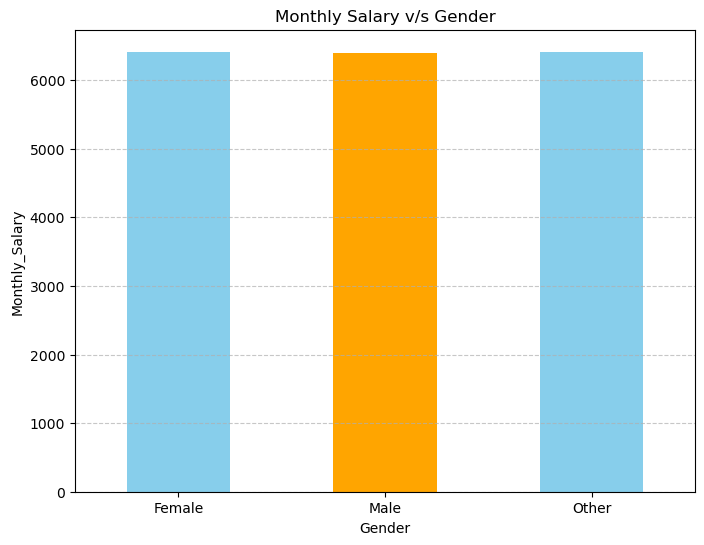

In [19]:
plt.figure(figsize=(8, 6))
salary_by_gender = df.groupby('Gender')['Monthly_Salary'].mean()
salary_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Monthly Salary v/s Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly_Salary')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
#INFERENCE
# Gender does not affect the monthly salary

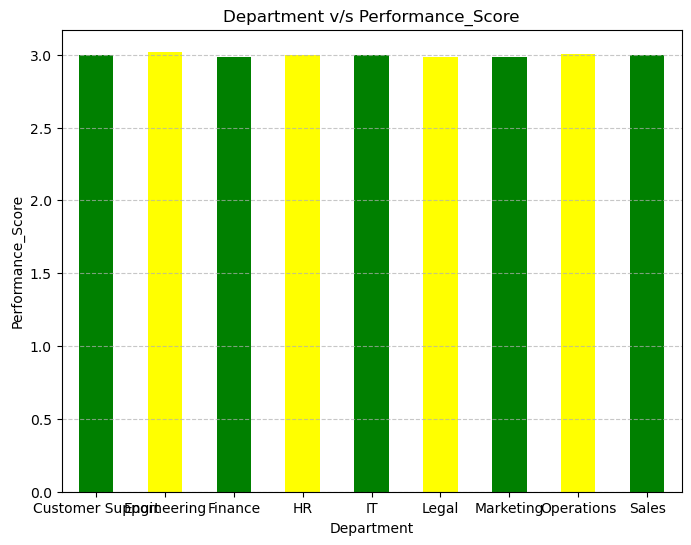

In [21]:
plt.figure(figsize=(8, 6))
salary_by_gender = df.groupby('Department')['Performance_Score'].mean()
salary_by_gender.plot(kind='bar', color=['green', 'yellow'])
plt.title('Department v/s Performance_Score')
plt.xlabel('Department')
plt.ylabel('Performance_Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [22]:
# Performance of employees in each dept is same.

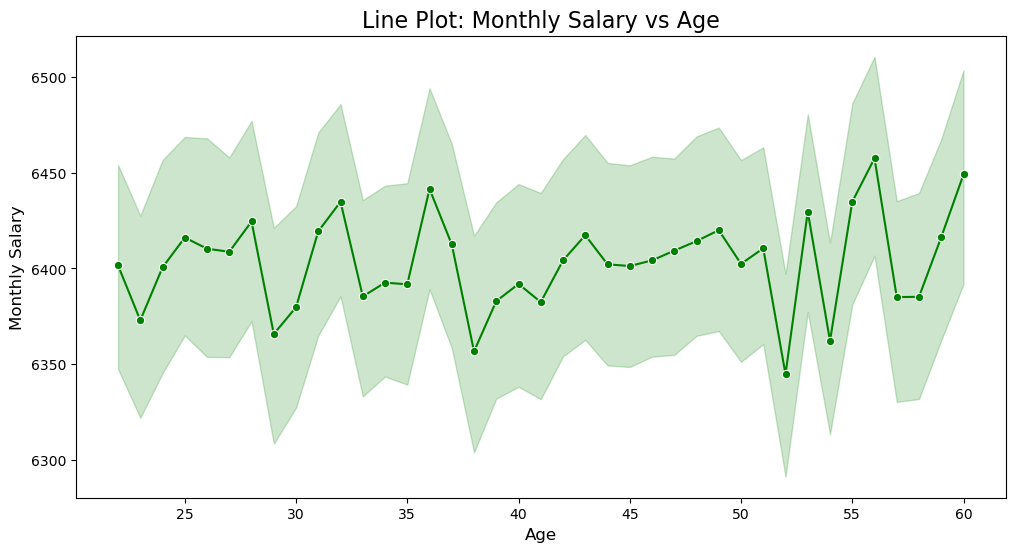

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Monthly_Salary', data=df, marker='o', color='green')
plt.title("Line Plot: Monthly Salary vs Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Monthly Salary", fontsize=12)
plt.show()

In [24]:
# All age group people may have different salary range.

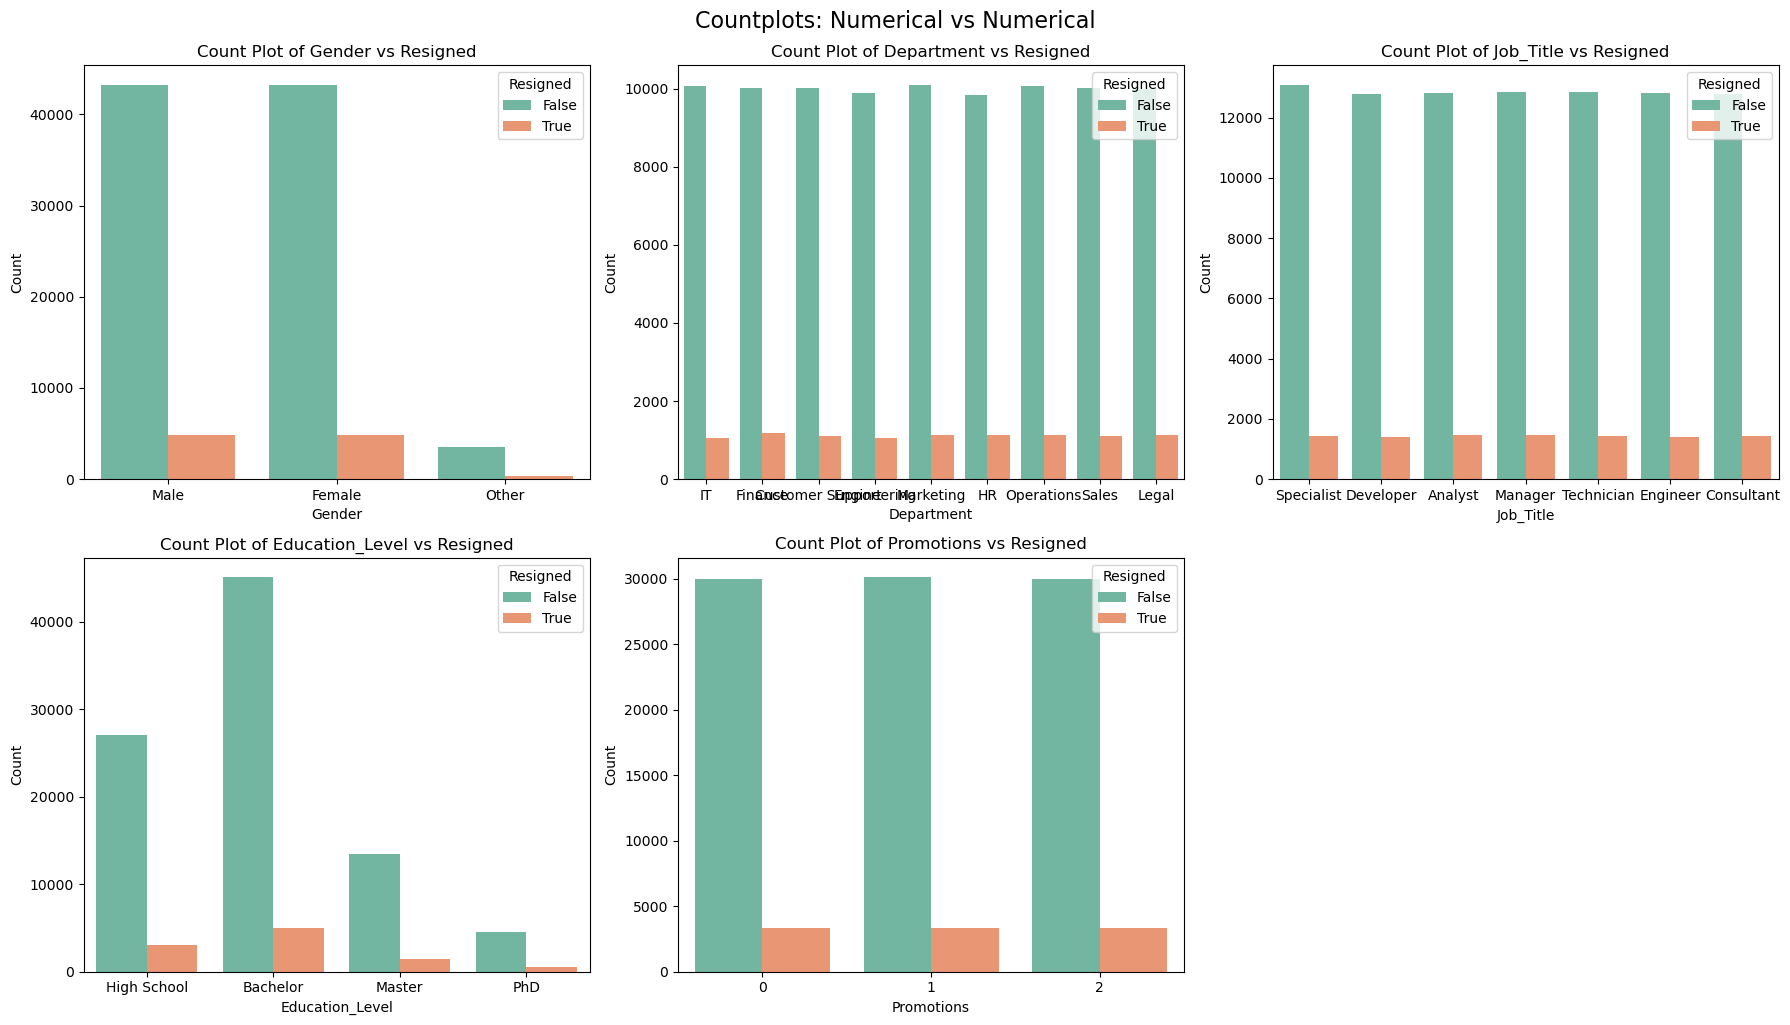

In [25]:
plt.figure(figsize=(18, 10))
for i, column in enumerate(categorical_columns[:-1], 1):  
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, hue='Resigned', palette='Set2')
    plt.title(f"Count Plot of {column} vs Resigned")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Resigned")
    plt.tight_layout()
plt.suptitle("Countplots: Numerical vs Numerical", fontsize=16, y=1.02)    
plt.show()

In [26]:
Job_Title_counts = df['Job_Title'].value_counts().reset_index()
Job_Title_counts.columns = ['Job_Title', 'Count']

fig = px.bar(Job_Title_counts,
    x = 'Job_Title',
    y = 'Count',
    title = "Distribution of Employees by Job Title"
)
fig.show()

# Outlier Detection

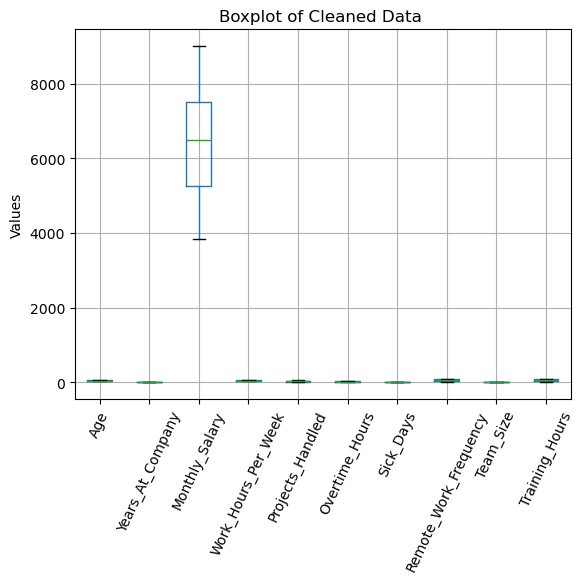

In [28]:
columns = ['Age',
       'Years_At_Company', 
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours']


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1 
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


cleaned_data = remove_outliers_iqr(df, columns)


cleaned_data[columns].boxplot()
plt.xticks(rotation=65)  
plt.title("Boxplot of Cleaned Data ")
plt.ylabel("Values")
plt.show()

In [29]:
# No outliers are present

In [30]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [31]:
df=df.drop(columns=['Employee_ID'],axis=1)  #irrelevant column

In [32]:
df.columns

Index(['Department', 'Gender', 'Age', 'Job_Title', 'Years_At_Company',
       'Education_Level', 'Performance_Score', 'Monthly_Salary',
       'Work_Hours_Per_Week', 'Projects_Handled', 'Overtime_Hours',
       'Sick_Days', 'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score', 'Resigned'],
      dtype='object')

In [33]:
df.dtypes

Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                   int64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

# Encoding

In [35]:
# Ordinal encording to education_level and job_title

ordinal_enc = OrdinalEncoder()

education_levels =  ['PhD','Master', 'High School', 'Bachelor']
job_title=['Specialist','Manager','Technician','Analyst','Engineer','Consultant','Developer']
ordinal_enc = OrdinalEncoder(categories=[education_levels,job_title]) 

df[[ 'Education_Level','Job_Title']] = ordinal_enc.fit_transform(df[['Education_Level','Job_Title']])


In [36]:
df1 = df.copy()

In [37]:
# applying one hot to gender column

In [38]:
onehot_enc = OneHotEncoder(sparse_output=False)
df1 = onehot_enc.fit_transform(df1[['Gender']])
df1

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [39]:
df1

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [40]:
one1=pd.DataFrame(df1,columns=['Male','Female','Others'])
one1

Male  Female  Others
0       0.0     1.0     0.0
1       0.0     1.0     0.0
2       0.0     1.0     0.0
3       1.0     0.0     0.0
4       1.0     0.0     0.0
...     ...     ...     ...
99995   0.0     1.0     0.0
99996   1.0     0.0     0.0
99997   0.0     1.0     0.0
99998   1.0     0.0     0.0
99999   1.0     0.0     0.0

[100000 rows x 3 columns]

In [41]:
df2=pd.concat([df,one1], axis=1)
df2

Department  Gender  Age  Job_Title  Years_At_Company  \
0                    IT    Male   55        0.0                 2   
1               Finance    Male   29        6.0                 0   
2               Finance    Male   55        0.0                 8   
3      Customer Support  Female   48        3.0                 7   
4           Engineering  Female   36        3.0                 3   
...                 ...     ...  ...        ...               ...   
99995           Finance    Male   27        2.0                 1   
99996                IT  Female   36        5.0                 6   
99997        Operations    Male   53        3.0                 8   
99998                HR  Female   22        5.0                 9   
99999           Finance  Female   43        3.0                 0   

       Education_Level  Performance_Score  Monthly_Salary  \
0                  2.0                  5            6750   
1                  2.0                  5            7500   
2                  2.0                  3            5850   
3                  3.0                  2            4800   
4                  3.0                  2            4800   
...                ...                ...             ...   
99995              3.0                  4            4900   
99996              1.0                  5            8250   
99997              2.0                  2            4800   
99998              2.0                  5            8250   
99999              0.0                  1            4400   

       Work_Hours_Per_Week  Projects_Handled  ...  Sick_Days  \
0                       33                32  ...          2   
1                       34                34  ...         14   
2                       37                27  ...          3   
3                       52                10  ...         12   
4                       38                11  ...         13   
...                    ...               ...  ...        ...   
99995                   55                46  ...          3   
99996                   39                35  ...          0   
99997                   31                13  ...          5   
99998                   35                43  ...          1   
99999                   51                43  ...         11   

       Remote_Work_Frequency  Team_Size  Training_Hours  Promotions  \
0                          0         14              66           0   
1                        100         12              61           2   
2                         50         10               1           0   
3                        100         10               0           1   
4                        100         15               9           1   
...                      ...        ...             ...         ...   
99995                     75         16              48           2   
99996                      0         10              77           1   
99997                      0          5              87           1   
99998                     75          2              31           1   
99999                     75         13              45           1   

       Employee_Satisfaction_Score  Resigned  Male  Female  Others  
0                             2.63     False   0.0     1.0     0.0  
1                             1.72     False   0.0     1.0     0.0  
2                             3.17     False   0.0     1.0     0.0  
3                             1.86     False   1.0     0.0     0.0  
4                             1.25     False   1.0     0.0     0.0  
...                            ...       ...   ...     ...     ...  
99995                         1.28     False   0.0     1.0     0.0  
99996                         3.48      True   1.0     0.0     0.0  
99997                         2.60     False   0.0     1.0     0.0  
99998                         3.10     False   1.0     0.0     0.0  
99999                         2.64     False   1.0     0.0     0.0  



In [42]:
df2.columns.tolist()

['Department',
 'Gender',
 'Age',
 'Job_Title',
 'Years_At_Company',
 'Education_Level',
 'Performance_Score',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Projects_Handled',
 'Overtime_Hours',
 'Sick_Days',
 'Remote_Work_Frequency',
 'Team_Size',
 'Training_Hours',
 'Promotions',
 'Employee_Satisfaction_Score',
 'Resigned',
 'Male',
 'Female',
 'Others']

In [43]:
#Proportional frequency encoding to Department column
freq_encoding = df2['Department'].value_counts(normalize=True)   
df2['department'] = df2['Department'].map(freq_encoding)
df2=df2.drop(columns=["Department"])
df2

Gender  Age  Job_Title  Years_At_Company  Education_Level  \
0        Male   55        0.0                 2              2.0   
1        Male   29        6.0                 0              2.0   
2        Male   55        0.0                 8              2.0   
3      Female   48        3.0                 7              3.0   
4      Female   36        3.0                 3              3.0   
...       ...  ...        ...               ...              ...   
99995    Male   27        2.0                 1              3.0   
99996  Female   36        5.0                 6              1.0   
99997    Male   53        3.0                 8              2.0   
99998  Female   22        5.0                 9              2.0   
99999  Female   43        3.0                 0              0.0   

       Performance_Score  Monthly_Salary  Work_Hours_Per_Week  \
0                      5            6750                   33   
1                      5            7500                   34   
2                      3            5850                   37   
3                      2            4800                   52   
4                      2            4800                   38   
...                  ...             ...                  ...   
99995                  4            4900                   55   
99996                  5            8250                   39   
99997                  2            4800                   31   
99998                  5            8250                   35   
99999                  1            4400                   51   

       Projects_Handled  Overtime_Hours  ...  Remote_Work_Frequency  \
0                    32              22  ...                      0   
1                    34              13  ...                    100   
2                    27               6  ...                     50   
3                    10              28  ...                    100   
4                    11              29  ...                    100   
...                 ...             ...  ...                    ...   
99995                46               5  ...                     75   
99996                35               7  ...                      0   
99997                13               6  ...                      0   
99998                43              10  ...                     75   
99999                43              27  ...                     75   

       Team_Size  Training_Hours  Promotions  Employee_Satisfaction_Score  \
0             14              66           0                         2.63   
1             12              61           2                         1.72   
2             10               1           0                         3.17   
3             10               0           1                         1.86   
4             15               9           1                         1.25   
...          ...             ...         ...                          ...   
99995         16              48           2                         1.28   
99996         10              77           1                         3.48   
99997          5              87           1                         2.60   
99998          2              31           1                         3.10   
99999         13              45           1                         2.64   

       Resigned  Male  Female  Others  department  
0         False   0.0     1.0     0.0     0.11131  
1         False   0.0     1.0     0.0     0.11200  
2         False   0.0     1.0     0.0     0.11200  
3         False   1.0     0.0     0.0     0.11116  
4         False   1.0     0.0     0.0     0.10956  
...         ...   ...     ...     ...         ...  
99995     False   0.0     1.0     0.0     0.11200  
99996      True   1.0     0.0     0.0     0.11131  
99997     False   0.0     1.0     0.0     0.11181  
99998     False   1.0     0.0     0.0     0.10960  
99999     False   1.0     0.0     0.0     0.11200  

[10000

In [44]:
df2=df2.drop(columns='Gender',axis=1)

In [45]:
df2.columns

Index(['Age', 'Job_Title', 'Years_At_Company', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Resigned', 'Male', 'Female', 'Others',
       'department'],
      dtype='object')

In [46]:
df2

Age  Job_Title  Years_At_Company  Education_Level  Performance_Score  \
0       55        0.0                 2              2.0                  5   
1       29        6.0                 0              2.0                  5   
2       55        0.0                 8              2.0                  3   
3       48        3.0                 7              3.0                  2   
4       36        3.0                 3              3.0                  2   
...    ...        ...               ...              ...                ...   
99995   27        2.0                 1              3.0                  4   
99996   36        5.0                 6              1.0                  5   
99997   53        3.0                 8              2.0                  2   
99998   22        5.0                 9              2.0                  5   
99999   43        3.0                 0              0.0                  1   

       Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  \
0                6750                   33                32              22   
1                7500                   34                34              13   
2                5850                   37                27               6   
3                4800                   52                10              28   
4                4800                   38                11              29   
...               ...                  ...               ...             ...   
99995            4900                   55                46               5   
99996            8250                   39                35               7   
99997            4800                   31                13               6   
99998            8250                   35                43              10   
99999            4400                   51                43              27   

       Sick_Days  Remote_Work_Frequency  Team_Size  Training_Hours  \
0              2                      0         14              66   
1             14                    100         12              61   
2              3                     50         10               1   
3             12                    100         10               0   
4             13                    100         15               9   
...          ...                    ...        ...             ...   
99995          3                     75         16              48   
99996          0                      0         10              77   
99997          5                      0          5              87   
99998          1                     75          2              31   
99999         11                     75         13              45   

       Promotions  Employee_Satisfaction_Score  Resigned  Male  Female  \
0               0                         2.63     False   0.0     1.0   
1               2                         1.72     False   0.0     1.0   
2               0                         3.17     False   0.0     1.0   
3               1                         1.86     False   1.0     0.0   
4               1                         1.25     False   1.0     0.0   
...           ...                          ...       ...   ...     ...   
99995           2                         1.28     False   0.0     1.0   
99996           1                         3.48      True   1.0     0.0   
99997           1                         2.60     False   0.0     1.0   
99998           1                         3.10     False   1.0     0.0   
99999           1                         2.64     False   1.0     0.0   

       Others  department  
0         0.0     0.11131  
1         0.0     0.11200  
2         0.0     0.11200  
3         0.0     0.11116  
4         0.0     0.10956  
...       ...         ...  
99995     0.0     0.11200  
99996     0.0     0.11131  
99997     0.0     0.11181  
99998     0.0     0.10960  
99999     0.0     0.11200  

[100000 rows x 20 columns]

In [47]:
df2.dtypes

Age                              int64
Job_Title                      float64
Years_At_Company                 int64
Education_Level                float64
Performance_Score                int64
Monthly_Salary                   int64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
Male                           float64
Female                         float64
Others                         float64
department                     float64
dtype: object

# Correlation Matrix

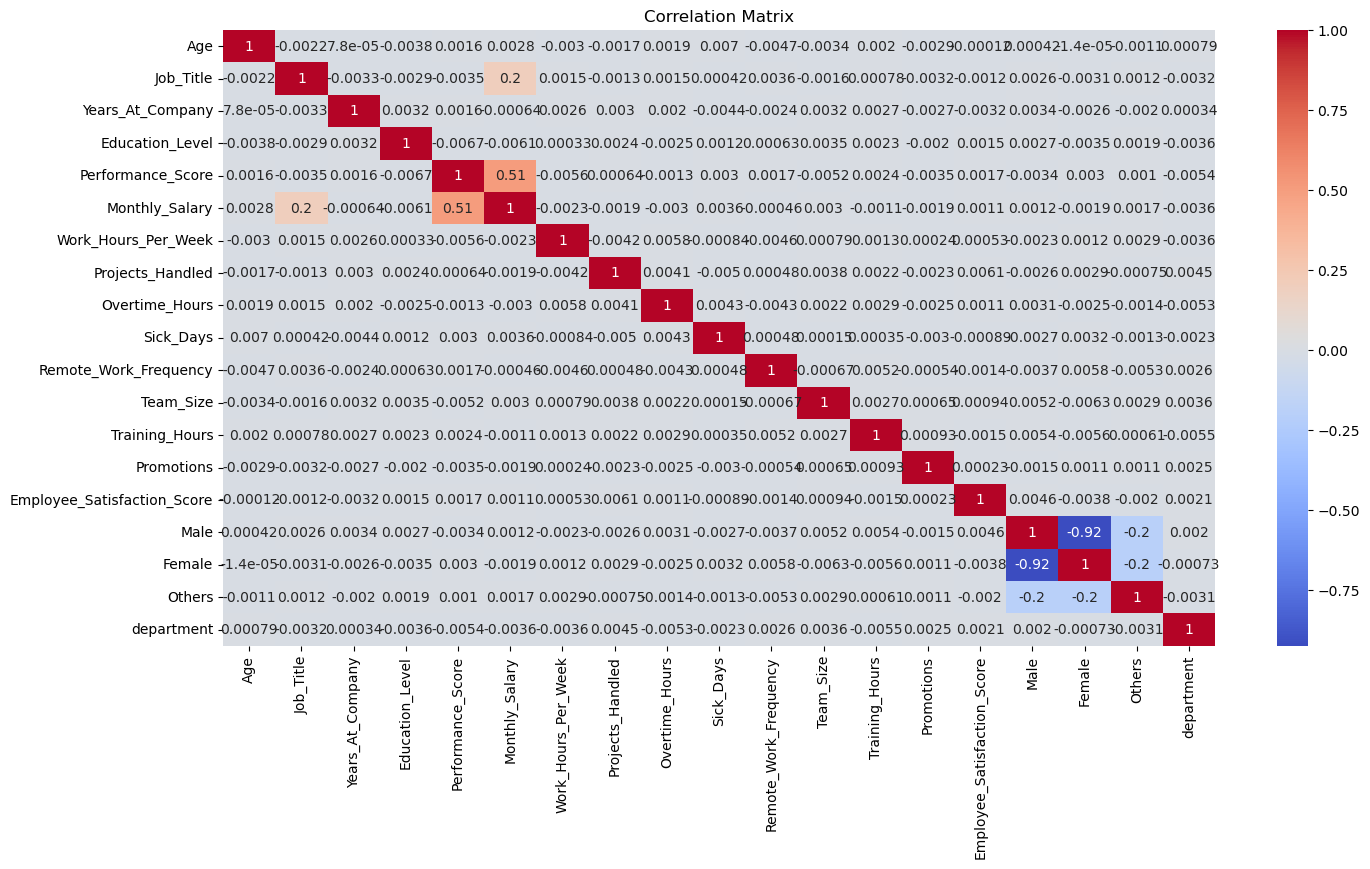

In [49]:
numerical_columns = df2.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scaling

In [51]:
target_column = 'Resigned'


numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns


numeric_columns = numeric_columns[numeric_columns != target_column]


min_max = MinMaxScaler()
df2[numeric_columns] = min_max.fit_transform(df2[numeric_columns])

In [52]:
df2

Age  Job_Title  Years_At_Company  Education_Level  \
0      0.868421   0.000000               0.2         0.666667   
1      0.184211   1.000000               0.0         0.666667   
2      0.868421   0.000000               0.8         0.666667   
3      0.684211   0.500000               0.7         1.000000   
4      0.368421   0.500000               0.3         1.000000   
...         ...        ...               ...              ...   
99995  0.131579   0.333333               0.1         1.000000   
99996  0.368421   0.833333               0.6         0.333333   
99997  0.815789   0.500000               0.8         0.666667   
99998  0.000000   0.833333               0.9         0.666667   
99999  0.552632   0.500000               0.0         0.000000   

       Performance_Score  Monthly_Salary  Work_Hours_Per_Week  \
0                   1.00        0.563107             0.100000   
1                   1.00        0.708738             0.133333   
2                   0.50        0.388350             0.233333   
3                   0.25        0.184466             0.733333   
4                   0.25        0.184466             0.266667   
...                  ...             ...                  ...   
99995               0.75        0.203883             0.833333   
99996               1.00        0.854369             0.300000   
99997               0.25        0.184466             0.033333   
99998               1.00        0.854369             0.166667   
99999               0.00        0.106796             0.700000   

       Projects_Handled  Overtime_Hours  Sick_Days  Remote_Work_Frequency  \
0              0.653061        0.758621   0.142857                   0.00   
1              0.693878        0.448276   1.000000                   1.00   
2              0.551020        0.206897   0.214286                   0.50   
3              0.204082        0.965517   0.857143                   1.00   
4              0.224490        1.000000   0.928571                   1.00   
...                 ...             ...        ...                    ...   
99995          0.938776        0.172414   0.214286                   0.75   
99996          0.714286        0.241379   0.000000                   0.00   
99997          0.265306        0.206897   0.357143                   0.00   
99998          0.877551        0.344828   0.071429                   0.75   
99999          0.877551        0.931034   0.785714                   0.75   

       Team_Size  Training_Hours  Promotions  Employee_Satisfaction_Score  \
0       0.722222        0.666667         0.0                       0.4075   
1       0.611111        0.616162         1.0                       0.1800   
2       0.500000        0.010101         0.0                       0.5425   
3       0.500000        0.000000         0.5                       0.2150   
4       0.777778        0.090909         0.5                       0.0625   
...          ...             ...         ...                          ...   
99995   0.833333        0.484848         1.0                       0.0700   
99996   0.500000        0.777778         0.5                       0.6200   
99997   0.222222        0.878788         0.5                       0.4000   
99998   0.055556        0.313131         0.5                       0.5250   
99999   0.666667        0.454545         0.5                       0.4100   

       Resigned  Male  Female  Others  department  
0         False   0.0     1.0     0.0    0.673077  
1         False   0.0     1.0     0.0    0.938462  
2         False   0.0     1.0     0.0    0.938462  
3         False   1.0     0.0     0.0    0.615385  
4         False   1.0     0.0     0.0    0.000000  
...         ...   ...     ...     ...         ...  
99995     False   0.0     1.0     0.0    0.938462  
99996      True   1.0     0.0     0.0    0.673077  
99997     False   0.0     1.0     0.0    0.865385  
99998     False   1.0     0.0     0.0    0.015385  
99999     False   1.0     0.

# Classification:-

In [54]:
# Defining Y and X

In [55]:
y=df2['Resigned']
X = df2.drop('Resigned',axis = 1)

# Train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

## creating a csv file for x_test and y_test

In [59]:
combined_data = X_test.copy()
combined_data['target'] = y_test  

combined_data = combined_data.reset_index()


combined_data.to_csv('test_data_with_index.csv', index=False)

print("X_test and y_test with row indices have been saved to 'test_data_with_index.csv'")

X_test and y_test with row indices have been saved to 'test_data_with_index.csv'


# Handling class imbalance

In [61]:
X = df2.drop('Resigned', axis=1)
y = df2['Resigned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df2 = pd.concat([X_resampled, y_resampled], axis=1)

In [62]:
df2.shape

(126042, 20)

In [63]:
df2.columns

Index(['Age', 'Job_Title', 'Years_At_Company', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Male', 'Female', 'Others', 'department',
       'Resigned'],
      dtype='object')

In [64]:
df2['Resigned'].value_counts()

Resigned
False    63021
True     63021
Name: count, dtype: int64

In [65]:
df2.shape

(126042, 20)

# Logistic Regression

In [67]:
log_reg = LogisticRegression(max_iter=500)

log_reg.fit(X_resampled, y_resampled)

y_pred = log_reg.predict(X_test)

print("\nLogistic Regression Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))


Logistic Regression Metrics:
Accuracy: 0.48333333333333334
Precision: 0.8180291213975136
Recall: 0.48333333333333334
F1-Score: 0.5790692366998952


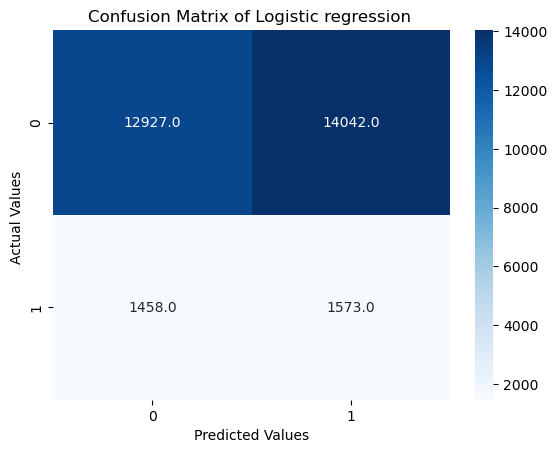

In [68]:
con_mat = confusion_matrix(y_test, y_pred)                     
ax = sns.heatmap(con_mat, annot=True, cmap='Blues',fmt=".1f")     
ax.set_title('Confusion Matrix of Logistic regression ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

# K-Nearest Neighbors (KNN)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_resampled, y_resampled)

y_pred_Knn = knn.predict(X_test)

print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_Knn))
print("Precision:", precision_score(y_test, y_pred_Knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_Knn, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_Knn, average='weighted'))


KNN Metrics:
Accuracy: 0.5961666666666666
Precision: 0.819252886921349
Recall: 0.5961666666666666
F1-Score: 0.6761963891355799


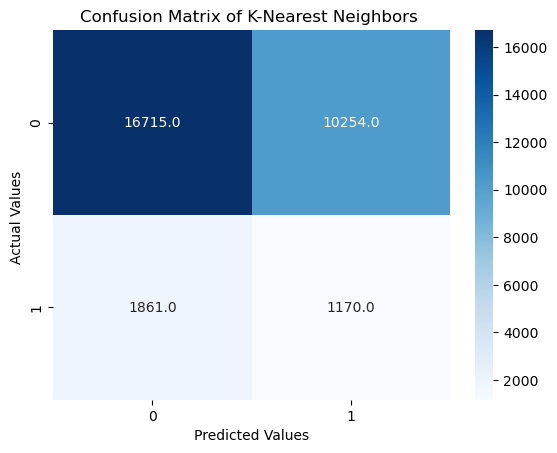

In [71]:
con_mat2 = confusion_matrix(y_test, y_pred_Knn)                      
ax = sns.heatmap(con_mat2, annot=True, cmap='Blues',fmt=".1f")     
ax.set_title('Confusion Matrix of K-Nearest Neighbors ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

# Random Forest

In [73]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4)  

rf.fit(X_resampled, y_resampled)


y_pred_rf = rf.predict(X_test)


print("\nRandom Forest Metrics :")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))


Random Forest Metrics :
Accuracy: 0.8093333333333333
Precision: 0.8193874805930762
Recall: 0.8093333333333333
F1-Score: 0.8142804450378828


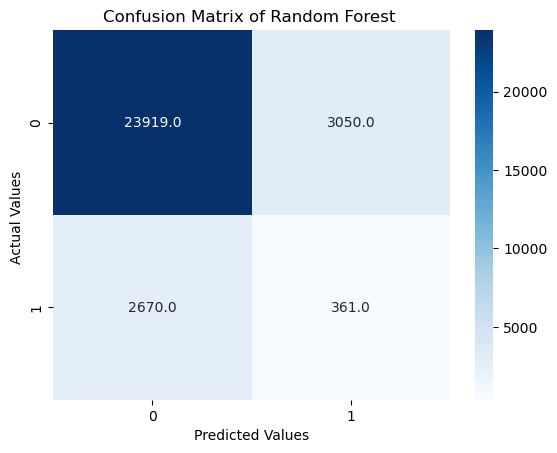

In [74]:
con_mat5 = confusion_matrix(y_test, y_pred_rf)                      
ax = sns.heatmap(con_mat5, annot=True, cmap='Blues',fmt=".1f")     
ax.set_title('Confusion Matrix of Random Forest ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

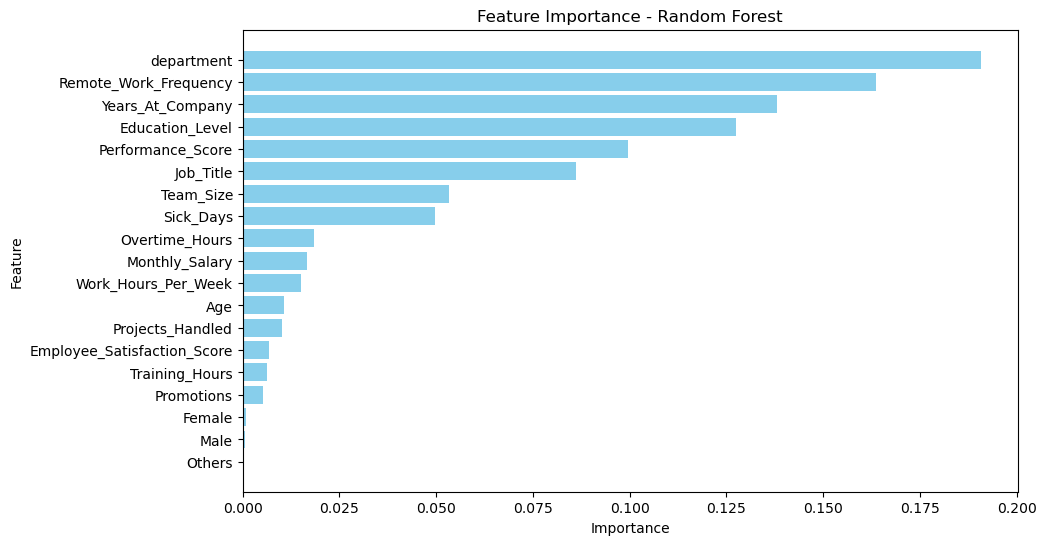

In [75]:
importances = rf.feature_importances_


feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.show()

# Decision Tree

In [77]:
dt_model=DecisionTreeClassifier(class_weight='balanced',max_depth=10, min_samples_split=4)
dt_model.fit(X_resampled, y_resampled)
y_pred_DT = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred_DT))
print('Precision:', precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_DT, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred_DT, average='weighted'))


Decision Tree Metrics:
Accuracy: 0.8964666666666666
Precision: 0.8139763881323883
Recall: 0.8964666666666666
F1-score: 0.8502052157974382


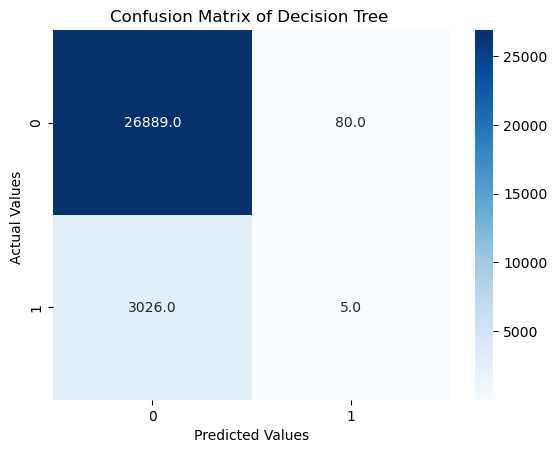

In [78]:
con_mat4 = confusion_matrix(y_test, y_pred_DT)                      
ax = sns.heatmap(con_mat4, annot=True, cmap='Blues',fmt=".1f")    
ax.set_title('Confusion Matrix of Decision Tree ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

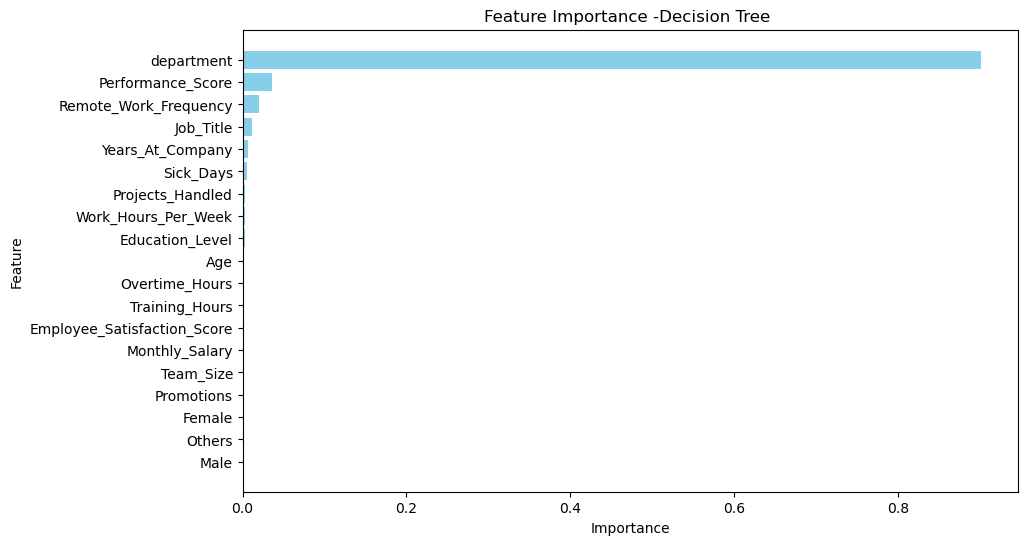

In [79]:
importances = dt_model.feature_importances_


feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance -Decision Tree ")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  
plt.show()

# Naive Bayes

In [81]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_resampled, y_resampled)


y_pred_NB = nb_classifier.predict(X_test)

# Print metrics
print("\nNaive Bayes Metrics:")
print('accuracy:', accuracy_score(y_test, y_pred_NB))
print('precision:', precision_score(y_test, y_pred_NB, average='weighted'))
print('recall:', recall_score(y_test, y_pred_NB, average='weighted'))
print('f1_score:', f1_score(y_test, y_pred_NB, average='weighted'))


Naive Bayes Metrics:
accuracy: 0.5581
precision: 0.8210604514325466
recall: 0.5581
f1_score: 0.6454700863416696


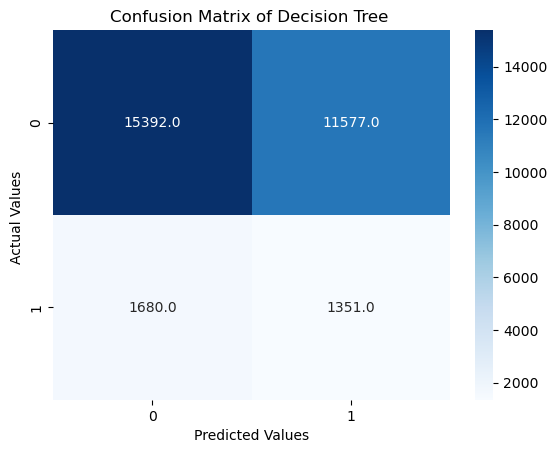

In [95]:
con_mat4 = confusion_matrix(y_test, y_pred_NB)                      
ax = sns.heatmap(con_mat4, annot=True, cmap='Blues',fmt=".1f")     
ax.set_title('Confusion Matrix of Decision Tree ')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

# xgboost

In [84]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_resampled, y_resampled)

y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_xgb, average='weighted'))


XGBoost Metrics:
Accuracy: 0.8989666666666667
Precision: 0.8586816465542148
Recall: 0.8989666666666667
F1-Score: 0.8512026511667137


## Hyperparameter turning on xgboost

In [87]:
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# param_grid = {
#     'learning_rate': [ 0.1, 0.2],
#     'n_estimators': [ 100, 200],
#     'max_depth': [ 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [ 0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [ 0.1, 0.5],
#     'reg_lambda': [ 2, 5],
# }

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
#                            scoring='f1_weighted', cv=3, verbose=2, n_jobs=-1)

# grid_search.fit(X_resampled, y_resampled)

# best_params = grid_search.best_params_
# best_xgb = grid_search.best_estimator_

# y_pred_xgb_tuned = best_xgb.predict(X_test)

# print("\nTuned XGBoost Metrics:")
# print("Best Parameters:", best_params)
# print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
# print("Precision:", precision_score(y_test, y_pred_xgb_tuned, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred_xgb_tuned, average='weighted'))
# print("F1-Score:", f1_score(y_test, y_pred_xgb_tuned, average='weighted'))

# Hyperparameter turning on knn

In [89]:
# # Define the hyperparameter grid for KNN
# param_grid = {
#     'n_neighbors': [ 9, 11],
#     'weights': ['uniform'],
#     'metric': ['euclidean' ],
#     'p': [1,2]
# }

# # Initialize KNN classifier
# knn = KNeighborsClassifier()

# # Perform Grid Search with Cross-Validation
# grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# # Train the model with the resampled (balanced) data
# grid_search.fit(X_resampled, y_resampled)

# # Print the best hyperparameters
# print("Best Parameters:", grid_search.best_params_)

# # Get the best model from the grid search
# best_knn = grid_search.best_estimator_

# # Predict using the best KNN model
# y_pred_Knn = best_knn.predict(X_test)

# # Evaluate the model
# print("\nKNN Metrics with Hyperparameter Tuning:")
# print("Accuracy:", accuracy_score(y_test, y_pred_Knn))
# print("Precision:", precision_score(y_test, y_pred_Knn, average='weighted'))
# print("Recall:", recall_score(y_test, y_pred_Knn, average='weighted'))
# print("F1-Score:", f1_score(y_test, y_pred_Knn, average='weighted'))

# Hyperparameter turning on random forest

In [91]:
# param_grid = {
#     'n_estimators': [50, 100],               
#     'max_depth': [ 20, None],              
#     'min_samples_split': [2, 4, 6],                
#     'min_samples_leaf': [2, 4],                
#     'max_features': ['sqrt'],      
#     'bootstrap': [True, False]                    
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# grid_search.fit(X_resampled, y_resampled)

# best_params = grid_search.best_params_
# print(f"Best Hyperparameters: {best_params}")

# best_rf_model = grid_search.best_estimator_
# y_pred_rf = best_rf_model.predict(X_test)

# print("\nTuned Random Forest Metrics:")
# print('Accuracy:', accuracy_score(y_test, y_pred_rf))
# print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
# print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
# print('F1-Score:', f1_score(y_test, y_pred_rf, average='weighted'))


In [97]:
import os
print(os.getcwd())


C:\Users\niranjana\Downloads


In [99]:
#pickling ordinal enc
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_enc, file)
print("OrdinalEncoder pickled successfully!")

with open('ordinal_encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)

OrdinalEncoder pickled successfully!


In [101]:
#onehot 

with open('onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_enc, file)
print("OneHotEncoder pickled successfully!")

with open('onehot_encoder.pkl', 'rb') as file:
    loaded_onehot_encoder = pickle.load(file)


OneHotEncoder pickled successfully!


In [103]:
# Pickle the frequency map
with open('freq_encoding.pkl', 'wb') as file:
    pickle.dump(freq_encoding, file)
print("Frequency encoding map pickled successfully!") 

with open('freq_encoding.pkl', 'rb') as file:
    loaded_freq_encoding = pickle.load(file)

Frequency encoding map pickled successfully!


In [105]:
# Pickle the trained MinMaxScaler
with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(min_max, file)
print("MinMaxScaler pickled successfully!")

with open('minmax_scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

MinMaxScaler pickled successfully!


In [111]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
print("Random Forest model pickled successfully!")

# Load the pickled Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)


Random Forest model pickled successfully!
